In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
import sys

%matplotlib inline
%reload_ext autoreload

sb.set_style("darkgrid")
sb.despine()

<Figure size 432x288 with 0 Axes>

In [3]:
df = pd.read_csv("D:\Open Classroom\Data Files\Canadian Immigration\Canadian_Immigration.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,Date (hidden),Programs covered
0,172,"January 7, 2021",Canadian Experience Class,4750,461,7-01-2021,Canadian Experience Class
1,171,"January 6, 2021",Provincial Nominee Program,250,813,6-01-2021,Provincial Nominee Program
2,170,"December 23, 2020",No program specified,5000,468,23-12-2020,Canadian Experience Class Federal Skilled Wor...
3,169,"December 9, 2020",No program specified,5000,469,09-12-2020,Canadian Experience Class Federal Skilled Wor...
4,168,"November 25, 2020",No program specified,5000,469,25-11-2020,Canadian Experience Class Federal Skilled Wor...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   #                                             173 non-null    int64 
 1   Date                                          173 non-null    object
 2   Immigration program                           173 non-null    object
 3   Invitations issued                            173 non-null    int64 
 4   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 5   Date (hidden)                                 173 non-null    object
 6   Programs covered                              173 non-null    object
dtypes: int64(3), object(4)
memory usage: 9.6+ KB


In [5]:
df.isnull()

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,Date (hidden),Programs covered
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
168,False,False,False,False,False,False,False
169,False,False,False,False,False,False,False
170,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False


In [6]:
df.rename(columns = {"#": "rec", "Date": "date",
                    "Immigration Program": "imm_program", 
                    "Invitaions Issued": "inv_issued",
                    "CRS score of lowest-ranked candidate invited": "cand_inv_score",
                    "Date (hidden)": "hidden_date", 
                    "Programs covered": "prog_covered"}, inplace = True)

In [7]:
df.head()

,rec,date,Immigration program,Invitations issued,cand_inv_score,hidden_date,prog_covered
0,172,"January 7, 2021",Canadian Experience Class,4750,461,7-01-2021,Canadian Experience Class
1,171,"January 6, 2021",Provincial Nominee Program,250,813,6-01-2021,Provincial Nominee Program
2,170,"December 23, 2020",No program specified,5000,468,23-12-2020,Canadian Experience Class Federal Skilled Wor...
3,169,"December 9, 2020",No program specified,5000,469,09-12-2020,Canadian Experience Class Federal Skilled Wor...
4,168,"November 25, 2020",No program specified,5000,469,25-11-2020,Canadian Experience Class Federal Skilled Wor...


In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.loc[0, "date"]

Timestamp('2021-01-07 00:00:00')

In [10]:
df["hidden_date"] = pd.to_datetime(df["hidden_date"])

In [11]:
df.loc[0, "hidden_date"]

Timestamp('2021-07-01 00:00:00')

In [12]:
df.head()

,rec,date,Immigration program,Invitations issued,cand_inv_score,hidden_date,prog_covered
0,172,2021-01-07,Canadian Experience Class,4750,461,2021-07-01,Canadian Experience Class
1,171,2021-01-06,Provincial Nominee Program,250,813,2021-06-01,Provincial Nominee Program
2,170,2020-12-23,No program specified,5000,468,2020-12-23,Canadian Experience Class Federal Skilled Wor...
3,169,2020-12-09,No program specified,5000,469,2020-09-12,Canadian Experience Class Federal Skilled Wor...
4,168,2020-11-25,No program specified,5000,469,2020-11-25,Canadian Experience Class Federal Skilled Wor...


In [13]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["month_year"] = df["date"].dt.strftime("%b-%Y")
df["month_year"] = pd.to_datetime(df["month_year"])
df["date_full"] = df["date"].dt.strftime("%d-%b-%Y")
df.head()

,rec,date,Immigration program,Invitations issued,cand_inv_score,hidden_date,prog_covered,month,year,month_year,date_full
0,172,2021-01-07,Canadian Experience Class,4750,461,2021-07-01,Canadian Experience Class,1,2021,2021-01-01,07-Jan-2021
1,171,2021-01-06,Provincial Nominee Program,250,813,2021-06-01,Provincial Nominee Program,1,2021,2021-01-01,06-Jan-2021
2,170,2020-12-23,No program specified,5000,468,2020-12-23,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,23-Dec-2020
3,169,2020-12-09,No program specified,5000,469,2020-09-12,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,09-Dec-2020
4,168,2020-11-25,No program specified,5000,469,2020-11-25,Canadian Experience Class Federal Skilled Wor...,11,2020,2020-11-01,25-Nov-2020


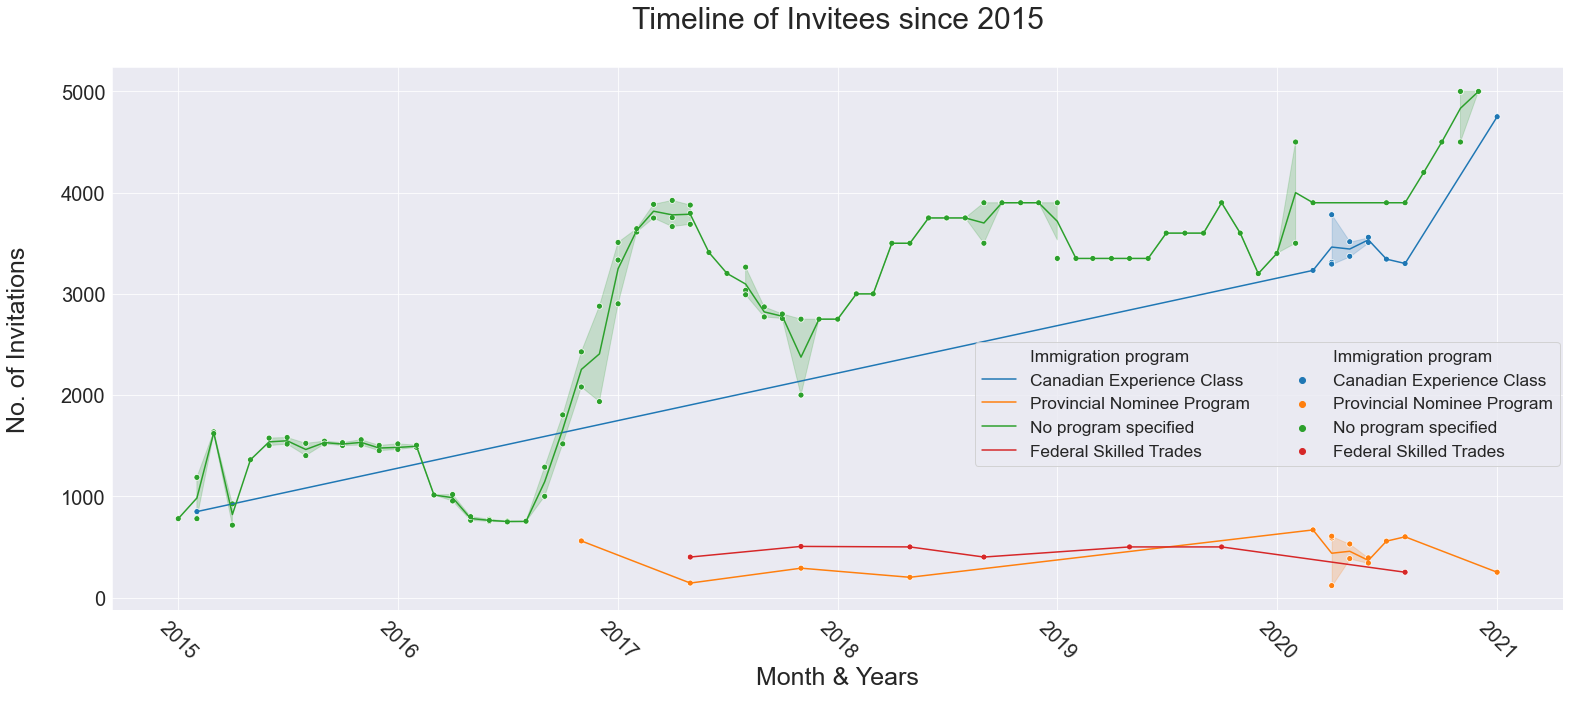

In [14]:
plt.figure(figsize = (26, 10))
sb.lineplot(x = "month_year", y = "Invitations issued", data = df, hue = "Immigration program")
sb.scatterplot(x = "month_year", y = "Invitations issued", data = df, hue = "Immigration program")
plt.xticks(rotation = -45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Month & Years\n", fontsize = 25)
plt.ylabel("No. of Invitations\n", fontsize = 25)
plt.title("Timeline of Invitees since 2015\n", fontsize = 30)
plt.legend(loc = "best", bbox_to_anchor=(0.5, 0., 0.5, 0.5), ncol = 2, fontsize = "xx-large", borderaxespad = 0.2)

In [15]:
df.head()

,rec,date,Immigration program,Invitations issued,cand_inv_score,hidden_date,prog_covered,month,year,month_year,date_full
0,172,2021-01-07,Canadian Experience Class,4750,461,2021-07-01,Canadian Experience Class,1,2021,2021-01-01,07-Jan-2021
1,171,2021-01-06,Provincial Nominee Program,250,813,2021-06-01,Provincial Nominee Program,1,2021,2021-01-01,06-Jan-2021
2,170,2020-12-23,No program specified,5000,468,2020-12-23,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,23-Dec-2020
3,169,2020-12-09,No program specified,5000,469,2020-09-12,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,09-Dec-2020
4,168,2020-11-25,No program specified,5000,469,2020-11-25,Canadian Experience Class Federal Skilled Wor...,11,2020,2020-11-01,25-Nov-2020


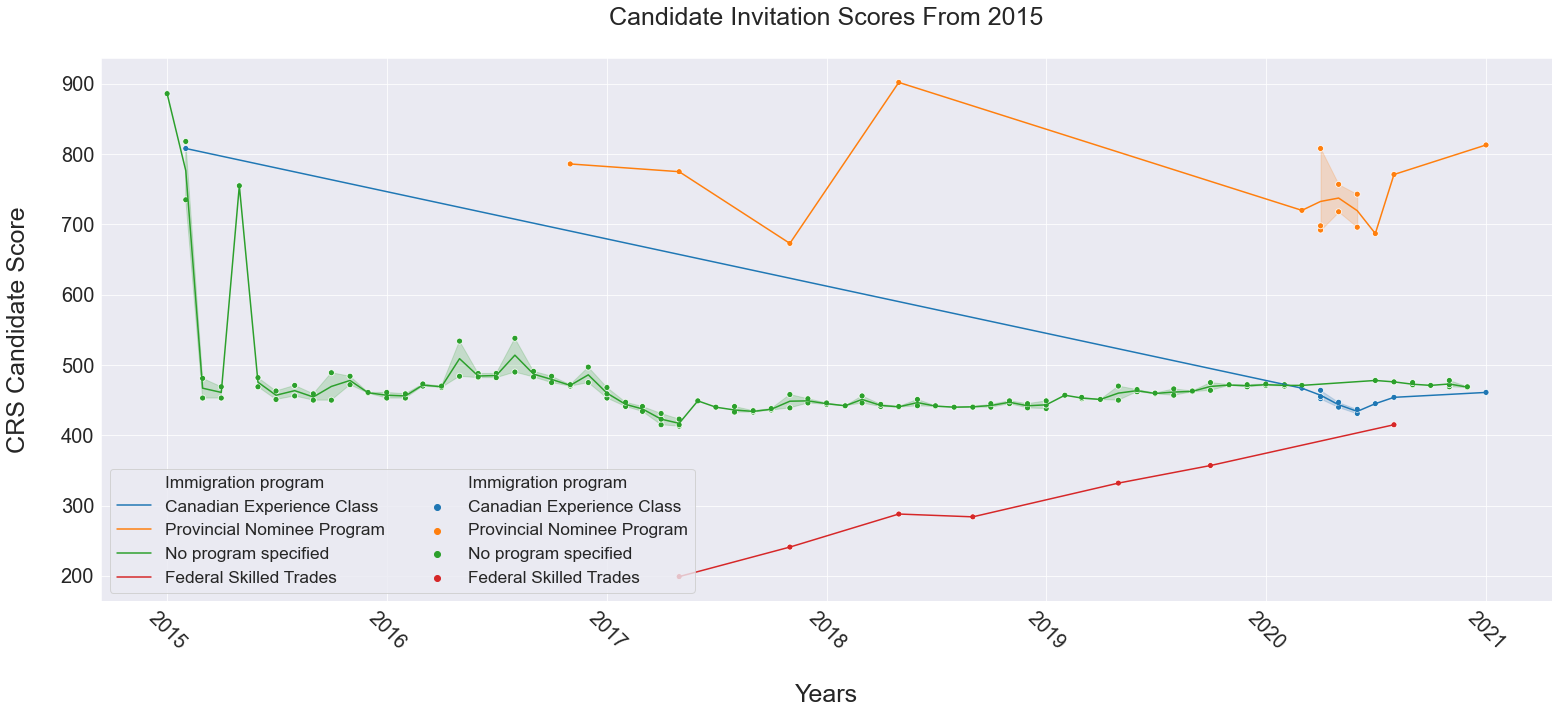

In [16]:
plt.figure(figsize = (26, 10))
sb.lineplot(x = "month_year", y = "cand_inv_score", data = df, hue = "Immigration program")
sb.scatterplot(x = "month_year", y = "cand_inv_score", data = df, hue = "Immigration program")
plt.xlabel("\nYears", fontsize = 25)
plt.ylabel("CRS Candidate Score\n", fontsize = 25)
plt.xticks(rotation = -45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Candidate Invitation Scores From 2015\n", fontsize = 25)
plt.legend(loc = "best", ncol = 2, fontsize = "xx-large")

In [17]:
df.head()

,rec,date,Immigration program,Invitations issued,cand_inv_score,hidden_date,prog_covered,month,year,month_year,date_full
0,172,2021-01-07,Canadian Experience Class,4750,461,2021-07-01,Canadian Experience Class,1,2021,2021-01-01,07-Jan-2021
1,171,2021-01-06,Provincial Nominee Program,250,813,2021-06-01,Provincial Nominee Program,1,2021,2021-01-01,06-Jan-2021
2,170,2020-12-23,No program specified,5000,468,2020-12-23,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,23-Dec-2020
3,169,2020-12-09,No program specified,5000,469,2020-09-12,Canadian Experience Class Federal Skilled Wor...,12,2020,2020-12-01,09-Dec-2020
4,168,2020-11-25,No program specified,5000,469,2020-11-25,Canadian Experience Class Federal Skilled Wor...,11,2020,2020-11-01,25-Nov-2020


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rec                  173 non-null    int64         
 1   date                 173 non-null    datetime64[ns]
 2   Immigration program  173 non-null    object        
 3   Invitations issued   173 non-null    int64         
 4   cand_inv_score       173 non-null    int64         
 5   hidden_date          173 non-null    datetime64[ns]
 6   prog_covered         173 non-null    object        
 7   month                173 non-null    int64         
 8   year                 173 non-null    int64         
 9   month_year           173 non-null    datetime64[ns]
 10  date_full            173 non-null    object        
dtypes: datetime64[ns](3), int64(5), object(3)
memory usage: 15.0+ KB


Text(0.5, 1.0, 'Heatmap for Immigration Program \nBased on Invitations issued and Candidate Scores \n')

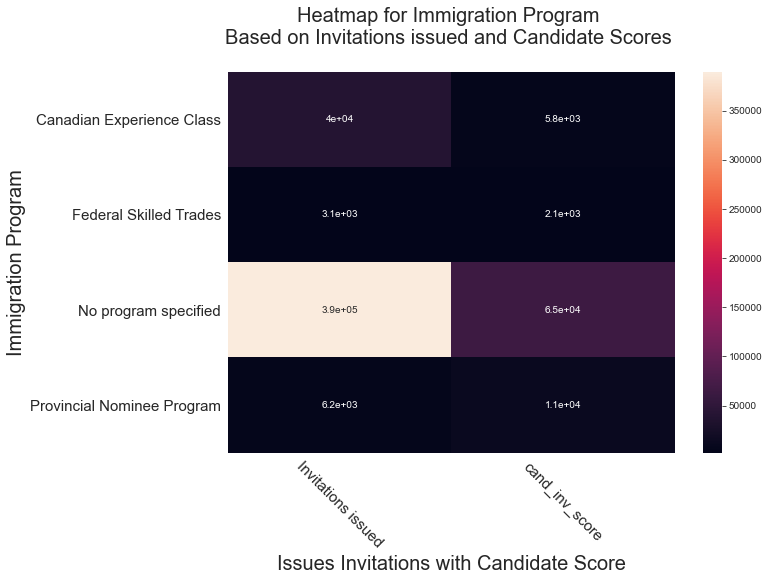

In [37]:
imm_prog = df.groupby("Immigration program").agg({"Invitations issued": "sum", 
                                                 "cand_inv_score": "sum"})
imm_prog.head()
plt.figure(figsize = (10, 7))
sb.heatmap(data = imm_prog, annot = True)
plt.xticks(rotation = -45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Issues Invitations with Candidate Score", fontsize = 20)
plt.ylabel("Immigration Program", fontsize = 20)
plt.title("Heatmap for Immigration Program \nBased on Invitations issued and Candidate Scores \n", fontsize = 20)

In [28]:
imm_prog.head()

,Invitations issued,cand_inv_score
Immigration program,,
Canadian Experience Class,39814,5761
Federal Skilled Trades,3055,2116
No program specified,389222,65116
Provincial Nominee Program,6227,11239


Text(0.5, 0, 'Program Covered')

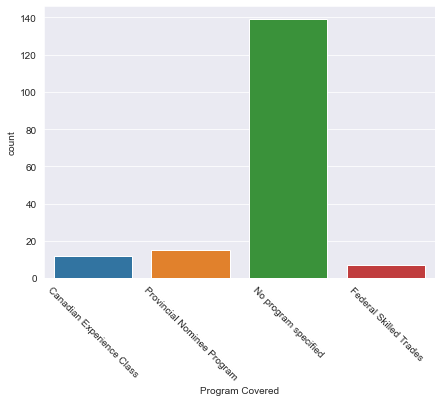

In [46]:
plt.figure(figsize = (7, 5))
sb.countplot(x = "Immigration program", data = df)
plt.xticks(rotation = -45)
plt.xlabel("Program Covered")

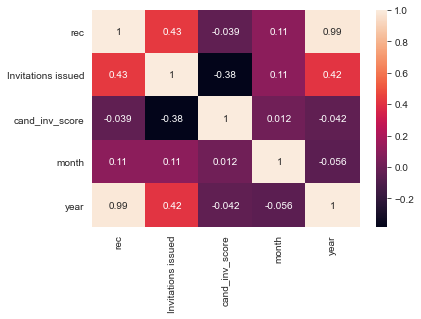

In [48]:
sb.heatmap(df.corr(method = "spearman"), annot = True)

In [19]:
df["prog_covered"].value_counts()

Canadian Experience Class  Federal Skilled Worker Program  Federal Skilled Worker Program  Provincial Nominee Program    139
Provincial Nominee Program                                                                                                15
Canadian Experience Class                                                                                                 12
Federal Skilled Trades                                                                                                     7
Name: prog_covered, dtype: int64

In [20]:
df["Immigration program"].value_counts()

No program specified          139
Provincial Nominee Program     15
Canadian Experience Class      12
Federal Skilled Trades          7
Name: Immigration program, dtype: int64